In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
#creating an empty review list
redmi_reviews = []

In [4]:
for i in range (1,31):
    ip=[]
    url ="https://www.amazon.in/Redmi-Pro-Blue-64GB-Storage/product-reviews/B07DJHR5DY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [5]:
red_rev_string = " ".join(redmi_reviews)

In [6]:
#red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
#red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [7]:
#tok
#red_rev_words1 = red_rev_string.split(" ")

In [8]:
import nltk
#red_rev = str(redmi_reviews)
from nltk.tokenize import sent_tokenize    
tokenize_sent = sent_tokenize(red_rev_string)
#tokenize_sent1 = str(tokenize_sent)
#from nltk.tokenize import word_tokenize
#token_word = word_tokenize()

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [10]:
a = stopwords.words('english')
wordnet = WordNetLemmatizer()

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [13]:
filtered_split=[]
for i in range(len(tokenize_sent)):
    review = re.sub("[^A-Za-z" "]+"," ",tokenize_sent[i])
    review = re.sub("[0-9" "]+"," ",tokenize_sent[i])
    review =review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_split.append(review)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf= tf.fit_transform(filtered_split)
feature_names =  tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)

In [15]:
cloud = ",".join(df)

In [16]:
wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cloud)

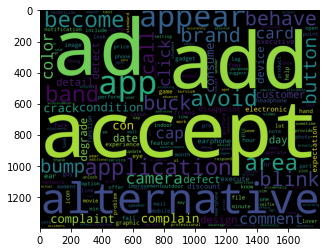

In [17]:
plt.imshow(wordcloud)

In [19]:
##For positive world cloud 
with open("positive-words (1).txt","r") as pos:
  poswords = pos.read().split("\n")

In [20]:
poswords = poswords[36:]

In [21]:
red_pos = ' '.join([w for w in df if w in poswords])

In [22]:
wordcloud_pos = WordCloud(
                           background_color = 'black',
                           width =1800,
                           height =1400
                           ).generate(red_pos)

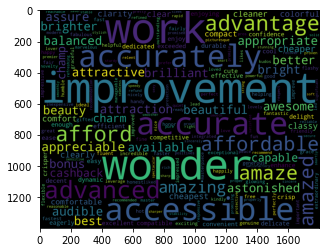

In [23]:
plt.imshow(wordcloud_pos)

In [24]:
##For negative word cloud
with open("negative-words.txt","r") as nos:
    negwords = nos.read().split("\n")

In [25]:
negwords =negwords[37:]

In [26]:
red_neg =' '.join([w for w in df if w in negwords])

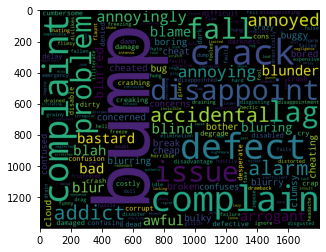

In [27]:
wordcloud_neg = WordCloud(
        background_color = 'black',
        width = 1800,
        height = 1400
        ).generate(red_neg)
plt.imshow(wordcloud_neg)